In [42]:
%matplotlib inline

import xgboost as xgb
import common

import evaluate

In [43]:
train_data = "C:\\programming\\betting\\output\\nba\\train\\train.csv"
test_data = "C:\\programming\\betting\\output\\nba\\test\\train.csv"

In [44]:
X, y = common.read_data_from_file(train_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])
X_test, y_test = common.read_data_from_file(test_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

In [45]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [46]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [47]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.64046	train-auc:0.65804
[1]	eval-auc:0.654461	train-auc:0.686699
[2]	eval-auc:0.660099	train-auc:0.700088
[3]	eval-auc:0.651872	train-auc:0.7138
[4]	eval-auc:0.653982	train-auc:0.721949
[5]	eval-auc:0.65407	train-auc:0.723902
[6]	eval-auc:0.646331	train-auc:0.730084
[7]	eval-auc:0.654939	train-auc:0.734063
[8]	eval-auc:0.638262	train-auc:0.740664
[9]	eval-auc:0.636143	train-auc:0.745929


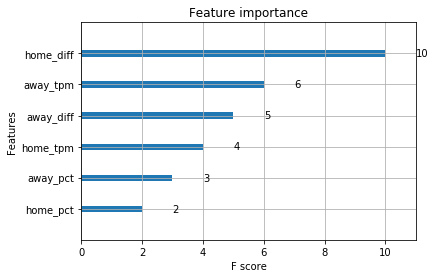

In [48]:
xgb.plot_importance(bst)

In [11]:
evaluate.evaluate("rs", bst, X_test, y_test)

AttributeError: 'DataFrame' object has no attribute 'feature_names'